## Classifiying Breast Tissue Samples as Malignant or Benign Using a Neural Net on Fine-Needle Aspiration Data

A simple neural net with selectable optimization coded from scratch in vectorized python is used for the classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data

The data for each column is as follows:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

For each of these features the mean, standard error and largest (mean of the three largest values) of each feature is included. For instance field 2 is Mean radius, field 13 is Radius SE, field 23 is Largest Radius

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.columns = ['id', 'diagnose', 'radius_m', 'texture_m', 'perimeter_m', 'area_m', 'smoothness_m', 'compactness_m', 'concavity_m', 'concave_points_m', 'symmetry_m','fractal_dim_m','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se','fractal_dim_se', 'radius_l', 'texture_l', 'perimeter_l', 'area_l', 'smoothness_l', 'compactness_l', 'concavity_l', 'concave_points_l', 'symmetry_l','fractal_dim_l']

In [4]:
data.describe()

,id,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_points_m,symmetry_m,...,radius_l,texture_l,perimeter_l,area_l,smoothness_l,compactness_l,concavity_l,concave_points_l,symmetry_l,fractal_dim_l
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Histograms of mean data**

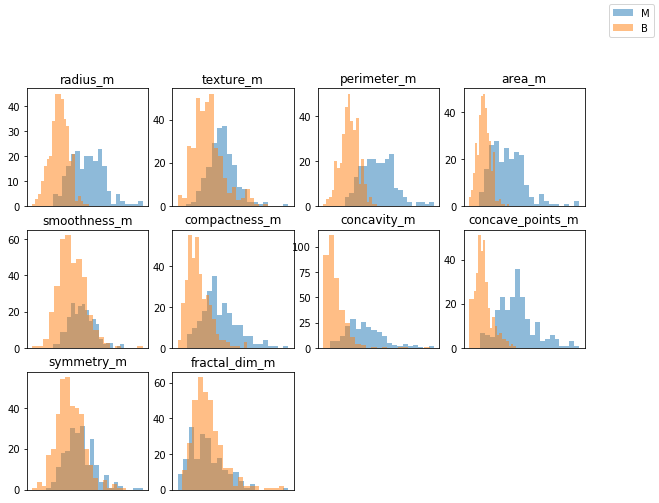

In [5]:
fig = plt.figure(figsize=(10,10))
label = []
for i in range(2, 12):
    fig.add_subplot(4, 4, i - 1)
    plt.xticks([])
    for h in ['M', 'B']:
        col = data.columns[i]
        segment = data[data.iloc[:,1] == h].iloc[:,i]
        l = plt.hist(segment, alpha=0.5, bins = 20)
        label.append(l)
        plt.title(col)
fig.legend(['M', 'B'])
plt.show()

**Histograms of maximum data**


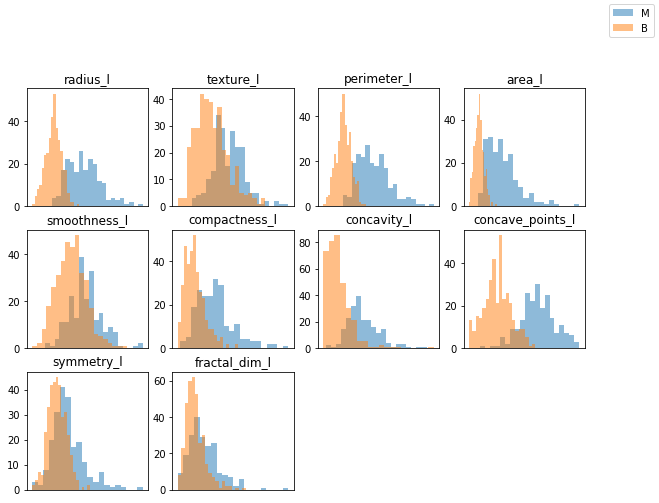

In [6]:
fig = plt.figure(figsize=(10,10))
label = []
for i in range(2, 12):
    fig.add_subplot(4, 4, i - 1)
    plt.xticks([])
    for h in ['M', 'B']:
        col = data.columns[i + 20]
        segment = data[data.iloc[:,1] == h].iloc[:,i + 20]
        l = plt.hist(segment, alpha=0.5, bins = 20)
        label.append(l)
        plt.title(col)
fig.legend(['M', 'B'])
plt.show()

In [7]:
plt.rcParams["figure.figsize"] = (20,15)

**Pair Plot of Mean Data**

In [8]:
data_select = {'mean':0, 'std':10, 'max':20}

In [9]:
offset = data_select['mean']

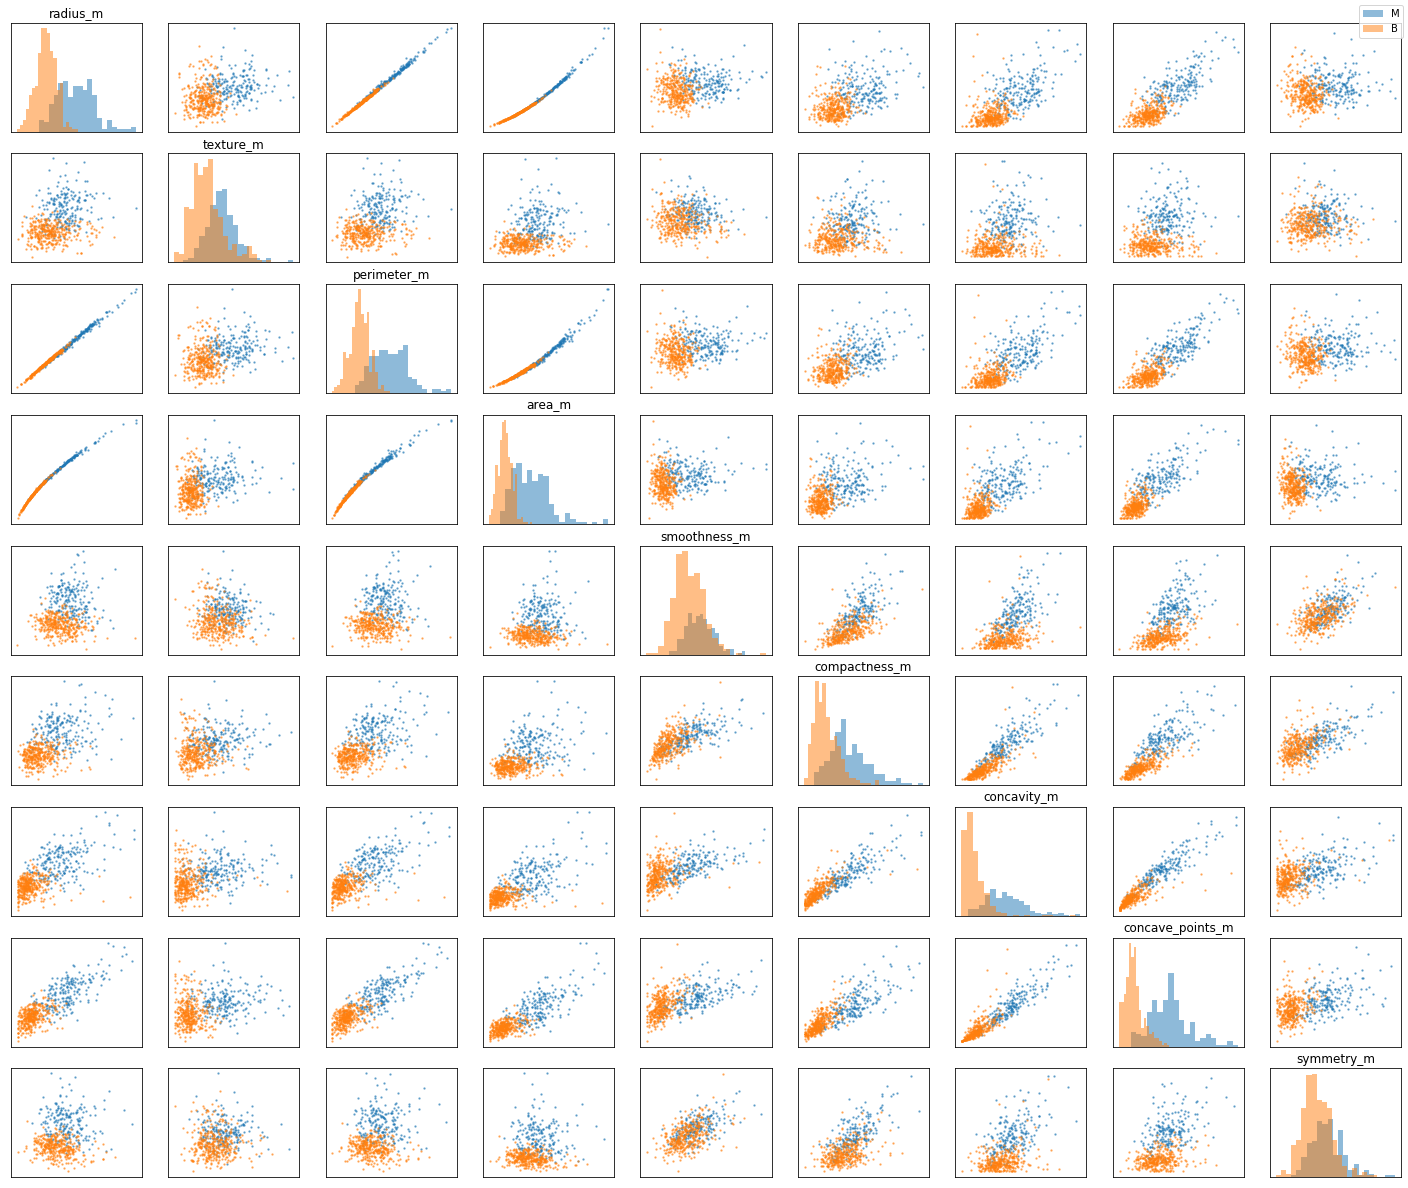

In [10]:
data_col_len = 10
fig = plt.figure()
for row in range(1, data_col_len):
    for col in range(1, data_col_len):
        fig.add_subplot(data_col_len, data_col_len, data_col_len * row + col)
        plt.xticks([])
        plt.yticks([])
        if row == col:
            col_name = data.columns[col + 1 + offset]
            for h in ['M', 'B']:
                segment = data[data.iloc[:,1] == h][col_name]
                plt.hist(segment, alpha=0.5, bins=20)
                plt.title(col_name)
        else:
            col_name = data.columns[col + 1 + offset]
            row_name = data.columns[row + 1 + offset]
            for h in ['M', 'B']:
                segment = data[data.iloc[:,1] == h]
                X = segment[row_name]
                Y = segment[col_name]
                plt.scatter(x=X, y=Y, alpha=0.5, s=2)
plt.subplots_adjust(top=1.2, bottom=0.01, hspace = 0.2, right=1.2)
fig.legend(['M','B'])
plt.show()

In [11]:
data.columns

Index(['id', 'diagnose', 'radius_m', 'texture_m', 'perimeter_m', 'area_m',
       'smoothness_m', 'compactness_m', 'concavity_m', 'concave_points_m',
       'symmetry_m', 'fractal_dim_m', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dim_se',
       'radius_l', 'texture_l', 'perimeter_l', 'area_l', 'smoothness_l',
       'compactness_l', 'concavity_l', 'concave_points_l', 'symmetry_l',
       'fractal_dim_l'],
      dtype='object')

Based on the pairplots redundent highly correlated fields are removed and the data is split into test and validation sets

In [12]:
X = data.copy()
y = data['diagnose'].copy()
del(X['id'], X['diagnose'], X['perimeter_m'], X['area_m'], X['perimeter_se'], X['area_se'], X['perimeter_l'], X['area_l'])
y[y == 'B'] = 0
y[y == 'M'] = 1
print('Number of features:', len(X.columns))
x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy().astype('int'), test_size=0.2)

Number of features: 24


### Training the Neural Net on the Data

In [13]:
import src.MultiLayerNet as MLN

In [14]:
net = MLN.Network()
net.add_layer('connected', 24, 100)
net.add_layer('ReLU', 100, 0)
net.add_layer('connected', 100, 100)
net.add_layer('ReLU', 100, 0),
net.add_layer('connected', 100, 100)
net.add_layer('ReLU', 100, 0),
net.add_layer('connected', 100, 2)


In [15]:
net.train(x_train, y_train, 0.1, 5000, validate=True, validate_x = x_test, validate_y = y_test, decay=0.001)

epoch 0/5000 - loss 0.6931960363650553 - val_loss 0.6898536827790752
epoch 1000/5000 - loss 0.4311180589245218 - val_loss 0.3668185002833617
epoch 2000/5000 - loss 0.20510981904061354 - val_loss 0.1443002252992289
epoch 3000/5000 - loss 0.15734256953015563 - val_loss 0.08502966201575841
epoch 4000/5000 - loss 0.14689084934842286 - val_loss 0.07496502355782289


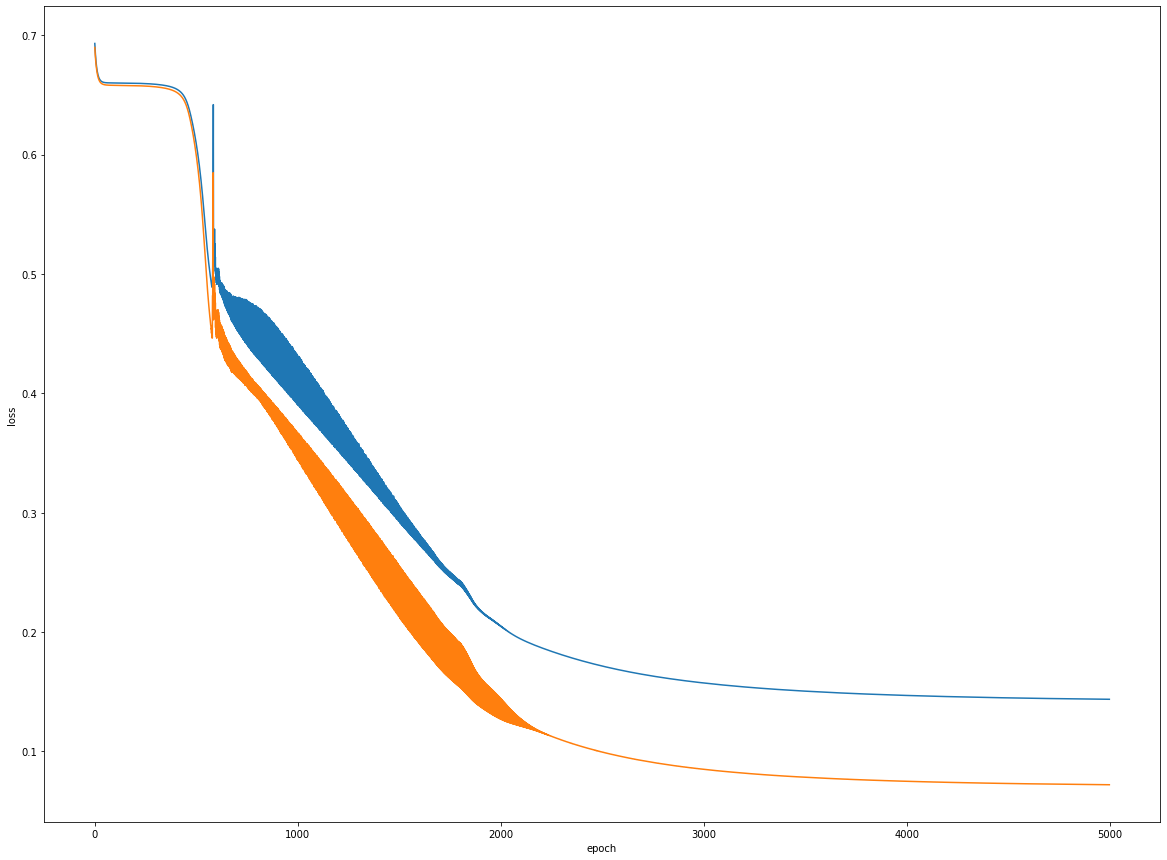

In [16]:
plt.plot(net.loss)
plt.plot(net.val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [17]:
y_predict = net.predict(x_test).argmax(axis=1)
correct = len(y_predict[y_predict == y_test])
print('Correct: {} / {}'.format(correct, len(y_predict)))
print('Validation Accuracy:', correct/len(y_predict))


Correct: 112 / 114
Validation Accuracy: 0.9824561403508771
